In [42]:
# Dependencies and Setup
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
#read the data sets from resources directory
csv_path = "static/data/train_cleaned.csv"
train_df = pd.read_csv(csv_path)

In [3]:
csv_path = "static/data/test_cleaned.csv"
test_df = pd.read_csv(csv_path)

In [4]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,64370.775000,18973.100000,144735.416667,342.050000,0.854167
std,68019.015008,31412.313561,80508.164214,65.212401,0.353307
min,1800.000000,0.000000,9000.000000,36.000000,0.000000
25%,34785.000000,0.000000,100000.000000,360.000000,1.000000
50%,46308.000000,13014.000000,128000.000000,360.000000,1.000000
75%,70230.000000,27039.000000,170000.000000,360.000000,1.000000
max,972000.000000,406044.000000,600000.000000,480.000000,1.000000


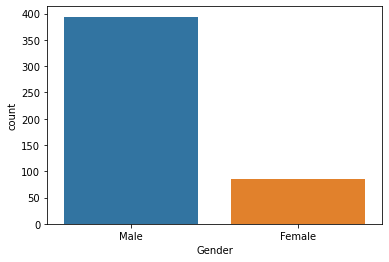

In [5]:
sns.countplot(train_df['Gender'])

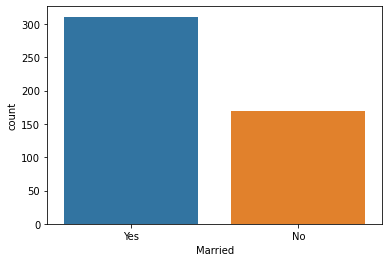

In [6]:
sns.countplot(train_df['Married'])

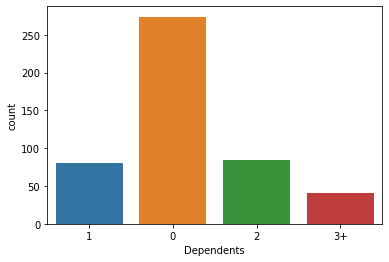

In [7]:
sns.countplot(train_df['Dependents'])

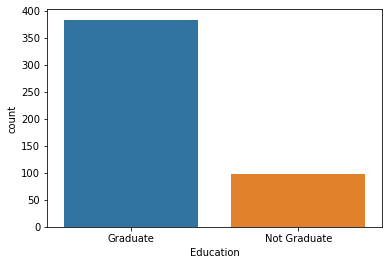

In [8]:
sns.countplot(train_df['Education'])

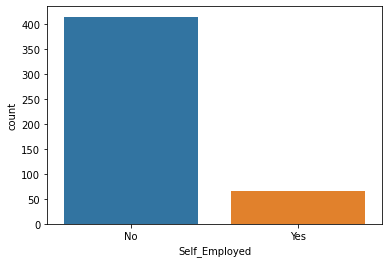

In [9]:
sns.countplot(train_df['Self_Employed'])

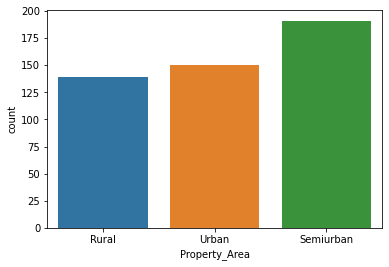

In [10]:
sns.countplot(train_df['Property_Area'])

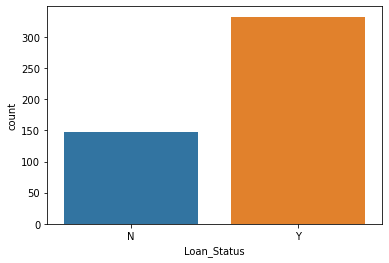

In [11]:
sns.countplot(train_df['Loan_Status'])

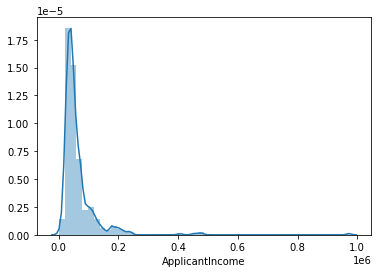

In [12]:
sns.distplot(train_df['ApplicantIncome'])

In [13]:
train_df['ApplicantIncome'] = np.log(train_df['ApplicantIncome'])

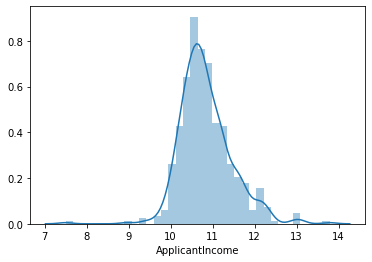

In [14]:
sns.distplot(train_df['ApplicantIncome'])

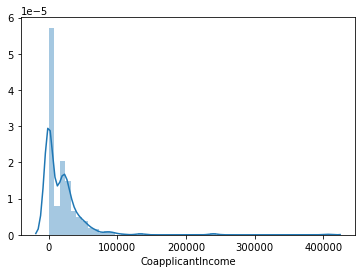

In [15]:
sns.distplot(train_df['CoapplicantIncome'])

In [16]:
train_df['CoapplicantIncome'] = np.log(train_df['CoapplicantIncome']+1)

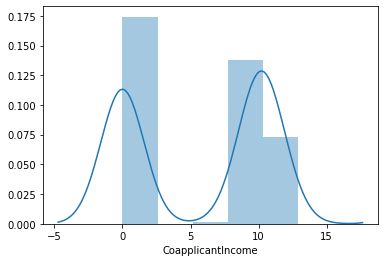

In [17]:
sns.distplot(train_df['CoapplicantIncome'])

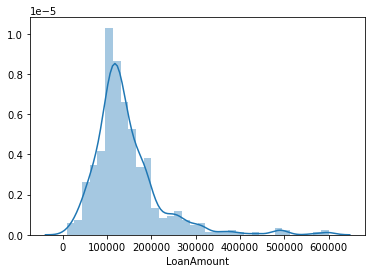

In [18]:
sns.distplot(train_df['LoanAmount'])

In [19]:
train_df['LoanAmount'] = np.log(train_df['LoanAmount'])

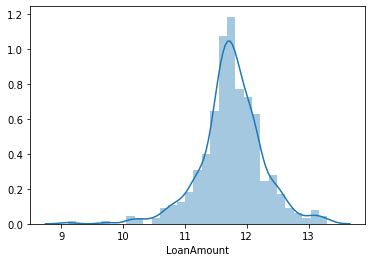

In [20]:
sns.distplot(train_df['LoanAmount'])

/Users/ireneh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


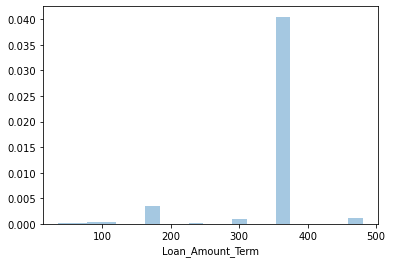

In [21]:
sns.distplot(train_df['Loan_Amount_Term'])

In [22]:
train_df['Loan_Amount_Term'] = np.log(train_df['Loan_Amount_Term'])

/Users/ireneh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


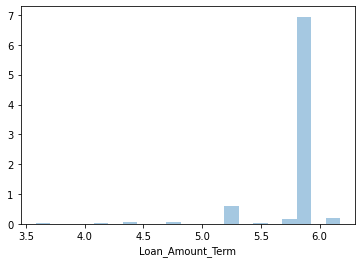

In [23]:
sns.distplot(train_df['Loan_Amount_Term'])

/Users/ireneh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


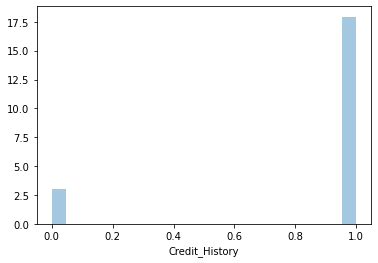

In [24]:
sns.distplot(train_df['Credit_History'])

In [25]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']

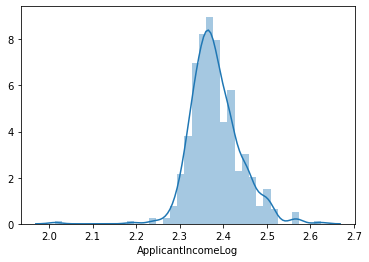

In [26]:
train_df['ApplicantIncomeLog'] = np.log(train_df['ApplicantIncome'])
sns.distplot(train_df['ApplicantIncomeLog'])

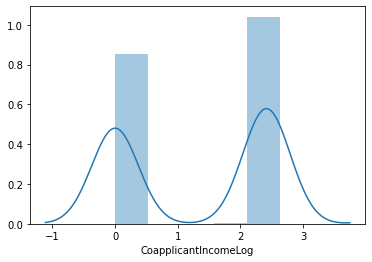

In [27]:
train_df['CoapplicantIncomeLog'] = np.log(train_df['CoapplicantIncome']+1)
sns.distplot(train_df['CoapplicantIncomeLog'])

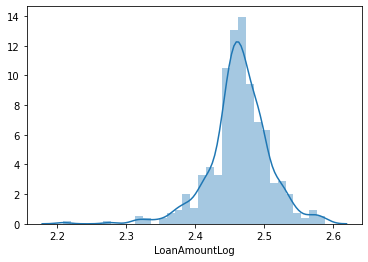

In [28]:
train_df['LoanAmountLog'] = np.log(train_df['LoanAmount'])
sns.distplot(train_df['LoanAmountLog'])

/Users/ireneh/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


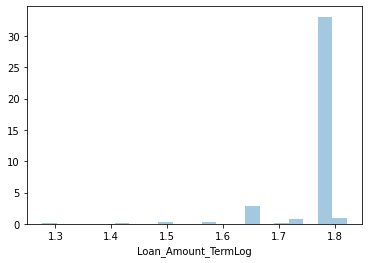

In [29]:
train_df['Loan_Amount_TermLog'] = np.log(train_df['Loan_Amount_Term'])
sns.distplot(train_df['Loan_Amount_TermLog'])

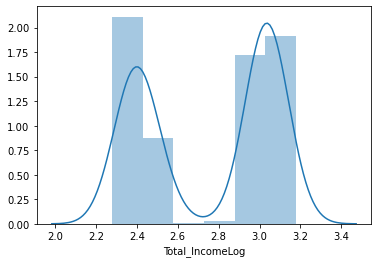

In [30]:
train_df['Total_IncomeLog'] = np.log(train_df['Total_Income'])
sns.distplot(train_df['Total_IncomeLog'])

In [31]:
corr = train_df.corr()

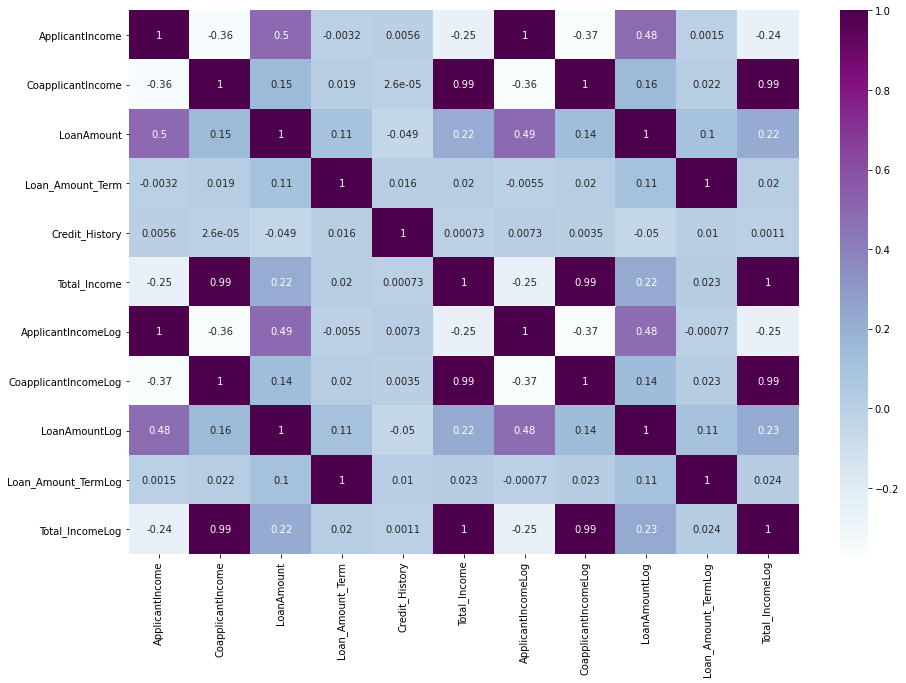

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [33]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' ,'Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
train_df= train_df.drop(columns = cols , axis = 1)

In [43]:
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols :
    train_df[col] = le.fit_transform(train_df[col])
    

In [44]:
X = train_df.drop(columns = ['Loan_Status'],axis =1)

In [45]:
y = train_df['Loan_Status']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [48]:
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is ", model.score(x_test,y_test)*100)
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation is ," ,np.mean(score)*100)


In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

Accuracy is  79.16666666666666
Cross validation is , 80.83333333333333


/Users/ireneh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
model = DecisionTreeClassifier()

In [52]:
classify(model,X,y)

Accuracy is  70.0
Cross validation is , 72.49999999999999


In [53]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is  80.0
Cross validation is , 79.79166666666667


In [54]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is  76.66666666666667
Cross validation is , 76.45833333333333
